# Frequency scaling of CMB foregrounds

In [1]:
# Notebook boilerplate.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams.update({'font.size': 14})

## Thermodynamic vs antenna temperature units

As a first step, we need to understand the slightly odd units that are typically used for CMB maps. The CMB itself is has a nearly perfect blackbody spectrum with a temperature of 2.73 K. Maps of CMB anisotropies show temperature fluctuations, measured in $\mu K$, about that background temperature. This is known as "thermodynamic units" and often represented as $\mu K_{CMB}$, where the CMB subscript indicates that you are talking about small fluctuations about 2.73 K.

However, the thing that microwave telescopes actually measure is the electromagnetic power into the telescope aperture with area $A$, from solid angle $\Omega$, in a particular range of electromagnetic frequency. Specifically, we can write the measured power as an integral of the blackbody intensity formula, $B_\nu$.

$$
\begin{equation}
P = A \Omega \int_{\nu_0}^{\nu_1} B_\nu d\nu
\end{equation}
$$

To keep things simple, we will assume for now that the telescope measures only a narrow range of frequencies $\Delta \nu$ so that we can treat $B_\nu$ as constant across that range. Plugging in the expression for blackbody intensity, we get

$$
\begin{equation}
P = A \Omega \Delta\nu \times \frac{2 h \nu^3}{c^2} \frac{1}{\exp(h\nu/kT) - 1} .
\end{equation}
$$

In the Rayleigh-Jeans limit, $h \nu \ll kT$, the expression becomes

$$
\begin{equation}
P_{RJ} = A \Omega \Delta\nu \times \frac{2 \nu^2 k T}{c^2} .
\end{equation}
$$

We want our map to be in units of temperature, but you can see above that the measured electromagnetic power is *not* linearly proportional, except in the Rayleigh-Jeans limit. Fortunately, the CMB temperature fluctuations have very small dynamic range -- tens to hundred of $\mu$K on a 2.73 K background -- so it is ok to approximate the non-linear temperature dependence of measured power as a first-order Taylor expansion centered at $T_{CMB}$.

$$
\begin{equation}
\frac{dP}{dT} = A \Omega \Delta\nu \times \frac{2 h^2 \nu^4}{c^2 k T^2} \frac{\exp(h\nu/kT)}{\left(\exp(h\nu/kT) - 1\right)^2}
\end{equation}
$$

This expression is the unit conversion factor between a small fluctuation in measured power and a small fluctuation in CMB temperature. We can compare this conversion to the one we would obtain in the Rayleigh-Jeans limit.

$$
\begin{equation}
\frac{dP_{RJ}}{dT} = A \Omega \Delta\nu \times \frac{2 \nu^2 k}{c^2}
\end{equation}
$$

Taking the ratio of these factors, we obtain a (dimensionless) conversion from "thermodynamic temperature" (actual temperature fluctuations about $T_{CMB}$) to "antenna temperature" (which is proportional to the measured electromagnetic power).

$$
\begin{equation}
(dP/dT) \, / \, (dP_{RJ}/dT) = \left( \frac{h \nu}{k T_{CMB}} \right)^2 \frac{\exp(h\nu/kT_{CMB})}{\left(\exp(h\nu/kT_{CMB}) - 1\right)^2}
\end{equation}
$$

Plotting this conversion factor as a function of frequency, we can see that it converges to 1 at low frequency (i.e. in the Rayleigh-Jeans limit).

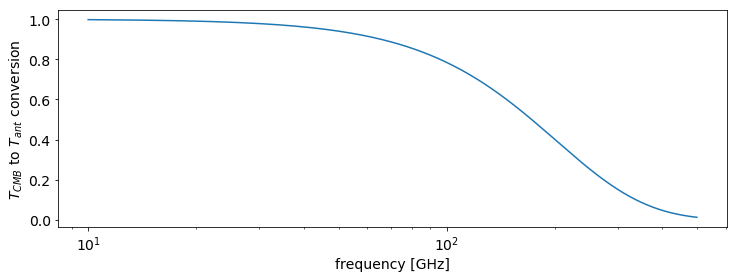

In [2]:
# Physical constants.
h = 6.6e-27 # erg s
k = 1.4e-16 # erg K^-1
T_CMB = 2.73 # K
# Calculate thermodynamic to antenna temperature conversion from 10 to 1000 GHz.
nu = np.arange(10, 500) * 1.0e9 # Hz
x = h * nu / (k * T_CMB)
conv = x**2 * np.exp(x) / (np.exp(x) - 1.0)**2
# Make plot.
plt.figure(figsize=(12,4))
plt.semilogx(nu / 1.0e9, conv)
plt.xlabel('frequency [GHz]')
plt.ylabel('$T_{CMB}$ to $T_{ant}$ conversion')

An important feature of thermodynamic temperature units is that a CMB signal expressed in these units *will have the same amplitude at all frequencies*. **This is the reason why we use $\mu K_{CMB}$ units for our maps.**

## Dust graybody frequency scaling

The dust foreground is due to thermal emission from diffuse microscopic particles in our Galaxy that are heated by starlight. Since this emission is thermal, we would expect it to obey a blackbody spectrum based on the physical temperature of the dust. However, emission is suppressed at millimeter wavelengths because those wavelengths are physically larger than the typical grain size. This leads to what is known as a "graybody" spectrum, which is a blackbody with emissivity that varies as a power law in frequency, with spectral index $\beta_d$.

$$
\begin{align}
I_{dust} &\propto \nu^\beta_d B_\nu \\
&\propto \frac{\nu^{3+\beta_d}}{\exp(h\nu/kT_{dust}) - 1}
\end{align}
$$

Planck measurements of polarized dust at intermediate Galactic latitudes favor $\beta = 1.59$ and $T_{dust} = 19.6$ K. See [Planck Intermediate Results XXII](http://arxiv.org/abs/1405.0874).

Note that this dust temperature is high enough that CMB observations, which are typically at frequencies $\ll 300$ GHz, are comfortably in the Rayleigh-Jeans limit. This means that measured power from dust is linearly proportional to $T_{dust}$, so we can't tell the difference between a change in $T_{dust}$ or a change in the total amount of dust (column density) without access to higher frequencies. In the plot below, you can just start to see the dust spectrum start to turn over for frequencies approaching 1 THz.

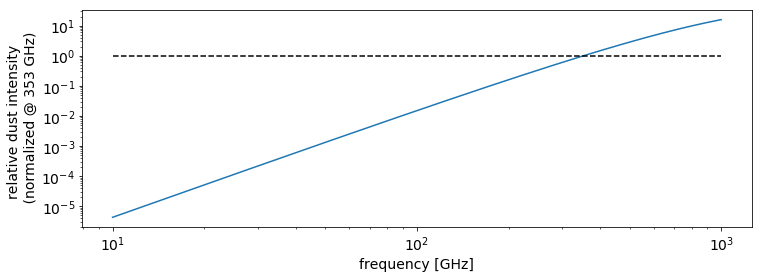

In [3]:
# Dust parameters.
beta_d = 1.59
T_d = 19.6
# Calculate dust signal amplitude from 10 to 1000 GHz. Normalized at 353 GHz.
nu = np.arange(10, 1000) * 1.0e9
xd = h * nu / (k * T_d)
xd353 = h * 353.e9 / (k * T_d)
Id = (nu / 353.e9)**(beta_d + 3.0) / (np.exp(xd) - 1.0) * (np.exp(xd353) - 1.0)
# Make plot.
plt.figure(figsize=(12,4))
plt.loglog(nu / 1.0e9, Id)
plt.plot([10, 1000], [1, 1], 'k--')
plt.xlabel('frequency [GHz]')
plt.ylabel('relative dust intensity \n (normalized @ 353 GHz)')

## Synchrotron power law scaling

The synchrotron foreground is due to emission from high energy electrons spiraling in the Galactic magnetic field. The characteristic electromagnetic frequency of synchrotron emission is given by
$$
\nu_{sync} = \frac{3 q}{4 \pi m_e c} \gamma^2 B ,
$$
where $q$ is the electron charge, $\gamma$ is the electron's relativistic velocity, and $B$ is the magnetic field. Of course the Galactic synchrotron emission is actually due to the entire population of free electrons, which have a wide range of energy and velocity. The energy spectrum of electrons follows a steep power law in energy (this can be measured directly by cosmic ray experiments), which means that the amplitude of synchrotron emission decreases with increasing frequency.

At CMB frequencies, it seems to be a good approximation to model the frequency dependence of synchrotron emission as a simple power law with slope $\beta_s$. However, the usual convention is to specify the $\beta_s$ power law relative to a Rayleigh-Jeans spectrum. Recall from above that the Rayleigh-Jeans spectrum scales with frequency as $\nu^2$. That means that the expression for the electromagnetic power as a function of frequency from the synchrotron foreground is given by

$$
I_{sync} \propto \nu^{2 + \beta_s} .
$$

We don't have very good measurements of polarized synchrotron emission at high Galactic latitudes, but available data suggests $\beta_s = -3.1$. See [Fuskeland et al, 2014](http://arxiv.org/abs/1404.5323), or [Planck 2015 Results XXV](http://arxiv.org/abs/1506.06660).

## Putting it all together

The brightness of the dust and synchrotron foregrounds at any point on the sky will also depend on the total column density of dust or free electron along that line of sight, so when we write those signals there will be an additional amplitude parameter. The foreground signal amplitudes are given in CMB thermodynamic temperature units at a specific electromagnetic frequency. For synchrotron, we typically specify the amplitude at 23 GHz (which is the lowest frequency band from the WMAP satellite); for dust, we use 353 GHz (which is the highest polarization-sensitive band from the Planck satellite). We choose to specify the foreground amplitudes at those frequencies because synchrotron is brightest at low frequencies and dust is brightest at high frequencies, so those are the bands where the foregrounds can be most easily constrained by data.

Since we want to specify the maps in thermodynamic temperature units, we need to use the unit conversions from the first section to properly calculate how these signals scale across frequencies. For instance, if we have a synchrotron signal with amplitude 1 $\mu K$ at 23 GHz and want to calcuate the amplitude at 150 GHz, we do the following:

1. Convert 1 $\mu K$ from thermodynamic units to antenna temperature units at 23 GHz.
2. Use power law scaling to go from 23 GHz to 150 GHz.
3. Convert back from antenna temperature to thermodynamic units at 150 GHz.

Remember that antenna temperature scales as $\nu^2$. So for step 2 we should use $\nu^{\beta_s}$ scaling, not the $\nu^{2+\beta_s}$ scaling that is listed above for intensity. Similarly, for dust the scaling is $\nu^{1+\beta_d} / (\exp(h\nu/kT_{dust}) - 1)$.

Example code here:

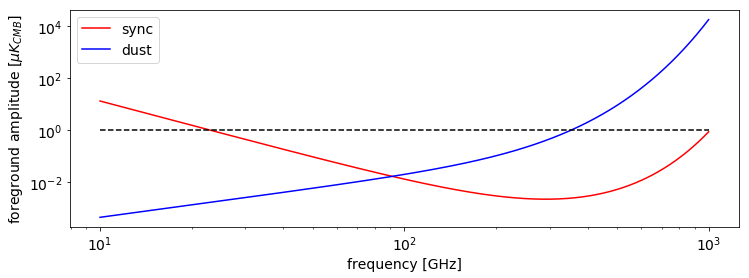

In [4]:
# Physical constants
h = 6.6e-27 # erg s
k = 1.4e-16 # erg K^-1
T_CMB = 2.73 # K

def TCMB_conv(nu):
    """Conversion from thermodynamic to antenna temperature"""
    
    x = h * nu / (k * T_CMB)
    return x**2 * np.exp(x) / (np.exp(x) - 1.0)**2

def scale_dust(beta_d, T_d, nu1, nu2):
    """Dust graybody scaling, in antenna temperature, from frequency nu1 to nu2"""
    
    x1 = h * nu1 / (k * T_d)
    a1 = nu1**(1.0 + beta_d) / (np.exp(x1) - 1.0)
    x2 = h * nu2 / (k * T_d)
    a2 = nu2**(1.0 + beta_d) / (np.exp(x2) - 1.0)
    return (a2 / a1)

def scale_sync(beta_s, nu1, nu2):
    """Synchrotron power-law scaling, in antenna temperature, from frequency nu1 to nu2"""
    
    return ((nu2 / nu1)**beta_s)

# Make a plot showing frequency scaling of:
# 1. synchrotron signal with amplitude 1 uK at 23 GHz
# 2. dust signal with amplitude 1 uK at 353 GHz
nu = np.arange(10, 1000) * 1.0e9
a_sync = TCMB_conv(23.0e9) * scale_sync(-3.1, 23.0e9, nu) / TCMB_conv(nu)
a_dust = TCMB_conv(353.0e9) * scale_dust(1.59, 19.6, 353.0e9, nu) / TCMB_conv(nu)
plt.figure(figsize=(12,4))
plt.loglog(nu / 1.0e9, a_sync, 'r', label='sync')
plt.loglog(nu / 1.0e9, a_dust, 'b', label='dust')
plt.plot([10, 1000], [1, 1], 'k--')
plt.xlabel('frequency [GHz]')
plt.ylabel('foreground amplitude [$\mu K_{CMB}$]')
plt.legend()

In the above plot, we see the expected behavior that the synchrotron amplitude decreases and the dust amplitude increases with increasing frequency. However, there is some odd behavior where the synchrotron amplitude turns around and starts *increasing* above ~300 GHz. This is due to the fact that we are using thermodynamic temperature. In units of electromagnetic power, the synchrotron amplitude continues to decrease according to its power-law, but the CMB 2.73 K blackbody spectrum is well into the exponentially-decaying Wien tail at this frequency, which means that the CMB signal is falling off even faster than the synchrotron. Because we are using units where the CMB signal is constant at all frequencies, the relative brightness of the synchrotron signal appears to increase (and the dust brightness increases even faster).